<a href="https://colab.research.google.com/github/TankerRongze/ZeRongNSCI0028_Project/blob/main/BELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Import Libraries
from google.colab import files
# To allow access to read google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import scipy.io
input_data = scipy.io.loadmat('/content/drive/MyDrive/Project/processed_data.mat')
# Print the input_data just read some moments ago
input_data

{'X': array([[1.235e+03, 8.700e+02, 5.850e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.216e+03, 8.680e+02, 5.900e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.205e+03, 8.710e+02, 5.880e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.203e+03, 8.510e+02, 5.210e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00],
        [1.193e+03, 8.380e+02, 5.310e+02, ..., 4.720e-03, 1.550e-03,
         0.000e+00],
        [1.246e+03, 8.100e+02, 5.440e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00]]), 'Y': array([[400. , 505. ,  35. ],
        [398. , 500. ,  36. ],
        [396. , 497. ,  36.5],
        ...,
        [462. , 571. ,  27.5],
        [464. , 577. ,  29. ],
        [510. , 613. ,  25.5]]), '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Nov 28 16:39:41 2018', '__version__': '1.0'}

In [59]:
import numpy as np

# Converting Input Data
X_unnormalized =  input_data['X']
print(X_unnormalized.shape)

# Converting Y from MATLAB format to NUMPY format and rename it to Y_targets
Y_targets =  input_data['Y'] # Select the target Y and pass it onto the variable called Y_targets

print(Y_targets.shape)

(63162, 27)
(63162, 3)


Select one target to be modelled (Predicted)

In [60]:
#Selecting only one TARGET at a time
T = Y_targets[:,0] # T = selected target
T.shape

(63162,)

In [61]:
from sklearn.model_selection import train_test_split # split the data into training and testing
from sklearn.preprocessing import StandardScaler  # Normalising the data
import matplotlib.pyplot as plt # for plotting results
from sklearn.preprocessing import MinMaxScaler # Normalizing data in the interval [0-1]

In [62]:
#  ---------     Using Normal distribution
normalise_to_Gaussian = StandardScaler()
X_normalised = normalise_to_Gaussian.fit_transform(X_unnormalized)
# np.amin(X_normalised[:,0])
np.amax(X_normalised)

# Normalizing the data to the Interval [0-1]
#  ---------     Normalise between [0-1]
# scaler = MinMaxScaler()
# scaler.fit(X_unnormalized)
# X_normalised = scaler.transform(X_unnormalized)

156.06536641578109

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X_normalised, T, test_size=0.2,random_state = 42)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(50529, 27) (50529,) (12633, 27) (12633,)


In [64]:
# Importing modules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import sqrt
   
# # Loading dataset
# dataset = load_boston()
# X, y = dataset.data, dataset.target
   
# # Splitting dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
   
# Creating and training model
model = BayesianRidge(tol=1e-5, fit_intercept=True, compute_score=True)
model.fit(x_train, y_train)
   
# Model making a prediction on test data
prediction = model.predict(x_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")


r2 Score Of Test Set : 0.879418884558951


MSE: 1741.95
RMSE: 41.74


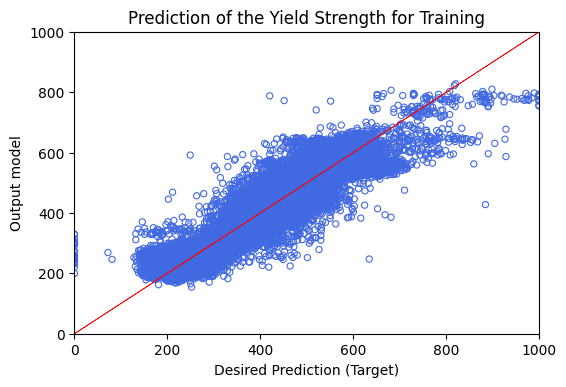

In [99]:
y_pred = model.predict(x_train)
plt.scatter(y_train,y_pred,c='none', marker='o', edgecolors='royalblue',linewidths=0.8,s=20)
#plt.scatter(y_pred, y_train)
mse = mean_squared_error(y_train, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))
plt.plot(y_train, y_train,'r-',linewidth=0.5)
#plt.plot(y_train, y_train,'g-')
plt.title("Prediction of the Yield Strength for Training")
plt.xlabel("Desired Prediction (Target)")
plt.ylabel("Output model")
plt.rcParams['savefig.dpi'] = 100 #保存图片分辨率
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()

MSE: 1793.42
RMSE: 42.35


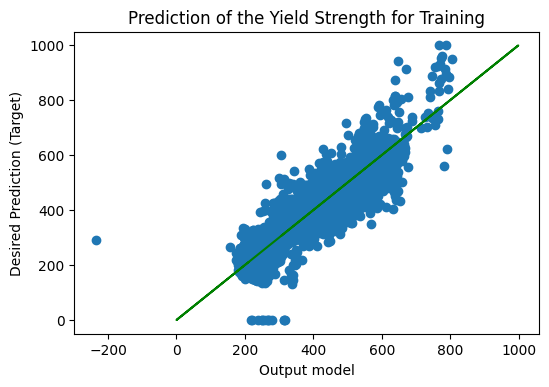

In [100]:
y_pred_test = model.predict(x_test)
plt.scatter(y_pred_test, y_test)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))
plt.plot(y_test, y_test,'g-')
plt.title("Prediction of the Yield Strength for Training")
plt.xlabel("Output model")
plt.ylabel("Desired Prediction (Target)")
plt.show()